# Geometric Brownian Motion Simulation

In this notebook we will be simulating the price behavior of a Stock at an initial price of 120.

To understand how this works, we do need to understand the definition of the Brownian Motion.

### Brownian Motion Definition: 

The stochastic process $ W := {W_t:t \ge 0} $ is called a Brownian Motion if
    
1.) $ W(0) = 0 $
    
2.) for $ s \le t, W_t - W_s $ is independent of the past history of W. The increments are independent of the past history of the process.

3.) $ W $ has continuous sample paths.

4.) $ W_t - W_s$ ~ $ W_{t-s} $ ~ $N(0,t-s)$ The Brownian Motion is normally distributed with zero mean and variance $ (t-s) $

### Modeling Brownian Motion

The model for an asset $S$ that takes any price at time $t$ that moves with GBM is usually represented with the equation below.

$$ dS_t = \mu S_tdt + \sigma S_tdW_t $$

Where $ \mu $ is the drift and $ \sigma $ is the volatility. 

Drift can be defined as the expected rate of return on the stock whereas the volatility is the standard deviation of log-returns.

This equation is known as a stochastic differential equation (SDE). And the solution of $S(t)$ requires an identity known as Ito's Lemma, which allows us to find the differential of a stochastic process.

If you would like to take a deeper look into the solution of this SDE, have a look [here.](https://en.wikipedia.org/wiki/Geometric_Brownian_motion)

Application of Ito's Lemma to the above SDE would yield the following.

$$ S_t = S_0e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t} $$

Where $ S_0 \gt 0 $



This is the equation that we need to model with our code in order to visualize the Brownian Motion. 

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# We need to assign our parameters.

S0 = 120 # initial stock price

mu = 0.35 # drift parameter

sigma = 0.55 # volatility parameter

paths = 750 # how many times are we simulating the price. We will have 750 lines on our graph

time = 1 # we would like to simulate this price behavior over one year.

dt = 1/252 # we would like to simulate this behavior over one year every single day. 1/252 because there are 252
#trading days in a year

price_paths = [] # empty list to append later

In [ ]:
class GBM:
    
    def simulate_paths(self):
        while(self.time - self.dt > 0):
            Wt = np.random.normal(0,math.sqrt(self.dt)) #BM follow a normal dist. with 0 mean and time step as variance
            Xt = self.mu*self.dt + self.sigma*Wt # change in price
            self.S0 += Xt # keep adding the change to the initial price
            self.prices.append(self.S0) # add new prices to a series
            self.time -= self.dt # we account here for the time step
            
    def __init__ (self, S0, mu, sigma, dt, time):
        self.S0 = S0
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.time = time
        self.prices = [ ]
        self.simulate_paths()       

In [ ]:
# Lets create a set of sample paths

for i in range (0,paths):
    price_paths.append(GBM(S0,mu,sigma,dt,time).prices)

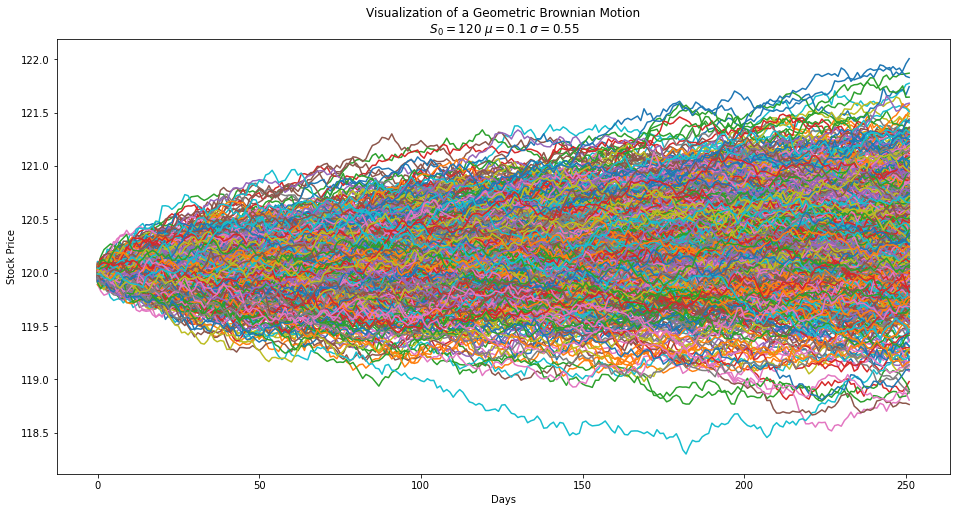

In [67]:
# Visualizing GBM
plt.figure(figsize = (16,8))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Visualization of a Geometric Brownian Motion\n $ S_0 = 120 $ $\mu = 0.1$ $\sigma = 0.55$')

for price_path in price_paths:
    plt.plot(price_path)
 
plt.savefig('BM.png',transparent = False, bbox_inches = 'tight',facecolor = 'w')
plt.show()